# Lab Assignment 4

## Hwayeon Kang, s2245661



## Task 1 (5 marks)

Give your implementation of the `plot_approx` and `approx_fourier` functions from Lab 4.

Use them to produce a plot of a Fourier series approximation of the function defined by

$$
f(x)=\left\{\begin{array}{ll}
-\frac{1}{2} x & -2 \leq x<0 \\
2 x-\frac{1}{2} x^2 & 0 \leq x<2
\end{array} \quad f(x+4)=f(x)\right.
$$

using the first 10 terms of the Fourier series.

Also include a piecewise plot of $f(x)$ for a single interval of periodicity.

In [1]:
# Import necessary libraries
import sympy as sym
import sympy.plotting as sym_plot
sym.init_printing()
from IPython.display import display_latex

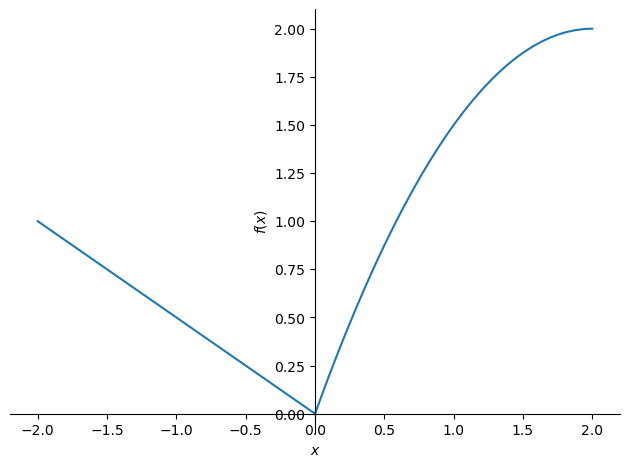

In [2]:
# Basic setup & plot of the given f(x)
x,n = sym.symbols('x, n')

f = sym.Piecewise(
    (-1/2*x, (x >= -2) & (x < 0)),
    (2*x - 1/2*x**2, (x >= 0) & (x < 2))
)

sym_plot.plot(f, (x,-2,2)) # Periodicity of 4

In [3]:
def approx_fourier(f, L, num_terms):

    a0 = sym.Rational(1,L)*sym.integrate(f, (x, -L, L))
    an = sym.Rational(1,L)*sym.integrate(f*sym.cos(n*sym.pi*x/L), (x, -L, L))
    bn = sym.Rational(1,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, -L, L))
    f_approx = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/L)+bn*sym.sin(n*sym.pi*x/L), (n,1,num_terms))
    return f_approx.doit()

def plot_approx(f, L, num_terms):

    f_approx = approx_fourier(f, L, num_terms)
    f_plot = sym_plot.plot((f_approx,(x,-2*L,2*L)), (f,(x,-L,L)), show  = False)
    f_plot[0].line_color = "blue" # Approximation
    f_plot[1].line_color = "red"  # Original
    return f_plot

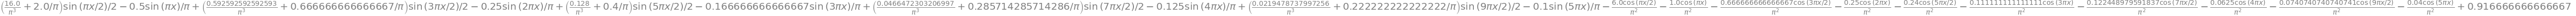

In [4]:
approx_fourier(f, 2, 10)

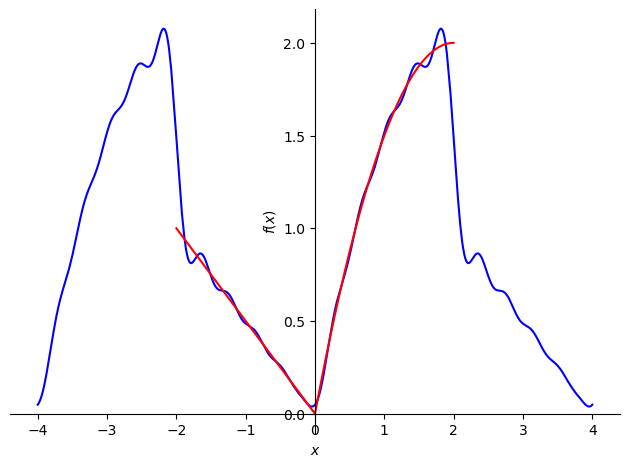

In [5]:
plot_approx(f, 2, 10).show()

## Task 2 (5 marks)

Solve Exercise $3.1$ from Lab 4 , but with the initial condition

$$
u(x, 0)=f(x)= \begin{cases}1 & L / 2-1<x<L / 2+1 \\ 0 & \text { otherwise. }\end{cases}
$$

Note that to ensure the code runs in reasonable time, you should use $L=10$ and run the animation for $0 \leq t \leq 20$, with only 2 frames per second. You should use at least 200 terms of the series solution in order to obtain a good approximation.
Describe the behaviour of the solution.

In [6]:
# Import additional necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

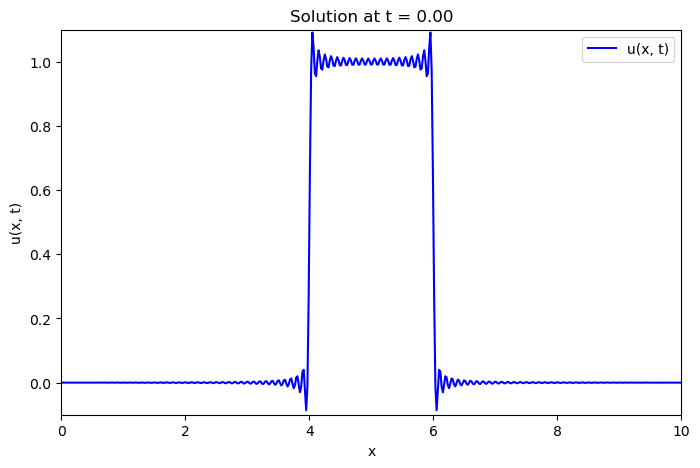

In [7]:
# Parameters
L = 10
alpha = 1
num_terms = 200
frames = 41  # Number of time steps for animation (2 fps for 20 seconds)
t_max = 20

x, n, t = sym.symbols('x n t', real=True, positive=True)

f = sym.Piecewise((1, (L/2-1 < x) & (x < L/2+1)), (0, True))

c_n = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))

# Build the Fourier series solution
u = sym.Sum(
    c_n * sym.exp(-alpha*(n*sym.pi/L)**2*t)*sym.sin(n*sym.pi*x/L),
    (n, 1, num_terms)
).doit()

# Convert symbolic solution to a numerical function
u_func = sym.lambdify((x, t), u, 'numpy')

# Spatial and temporal discretization
x_values = np.linspace(0, L, 500)  # Spatial points
t_values = np.linspace(0, t_max, frames)  # Time points

solutions = [u_func(x_values, t) for t in t_values]

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x_values, solutions[0], color="blue", label="u(x, t)")
ax.set_xlim(0, L)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Solution")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.legend()

def animate(frame):
    line.set_ydata(solutions[frame])
    ax.set_title(f"Solution at t = {t_values[frame]:.2f}")
    return line,

ani = animation.FuncAnimation(fig, animate, frames=frames, interval=500)  # 2 fps (500 ms per frame)

## Submission instructions

After producing the animation (as in the lab), you should also use the following line of code to produce an mp4 file of your animation. The file should then appear alongside the .ipynb file in your Jupyter file list. Note, if you are not using noteable, you will need to install ffmpeg. You can see this page for instructions https://ffmpeg.org/.

In [8]:
ani.save('hdeq_lab4_task2.mp4', writer='ffmpeg', fps=20)

Alternatively, you can use the code 

In [9]:
ani.save('hdeq_lab4_task2.gif', writer='Pillow ', fps=20)

MovieWriter Pillow  unavailable; using Pillow instead.


To save the simulation as a gif. Upload four files on gradsecope the .pdf, the .ipynb, the .py and the .mp4 (or .gif).